Hacemos los imports necesarios para los 3 datasets a analizar

### Contexto de los datasets

- **Credit Card Fraud:** Datos de transacciones de tarjetas de crédito, con el objetivo de detectar fraudes. Útil para problemas de clasificación binaria y detección de anomalías.
- **Hotel Bookings:** Reservas de hoteles, útil para analizar cancelaciones, estacionalidad y patrones de clientes.
- **Telco Customer Churn:** Información de clientes de una empresa de telecomunicaciones, orientado a predecir la baja de clientes.

In [11]:
# Imports
import zipfile
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [ ]:
# Función para cargar datasets
def cargar_datasets(path_externa, path_local, kaggle=0):
    """
    Intenta cargar un CSV desde (1) kagglehub, (2) la ruta externa (URL o path),
    (3) la ruta local. Devuelve DataFrame o lanza FileNotFoundError."""

    path_local = Path(path_local)

    # 1) Intento Kaggle (si corresponde)
    if kaggle == 1:
        try:
            res = kagglehub.dataset_download(path_externa)  # puede devolver path a carpeta/zip/file
            p = Path(res)
            # si es ZIP, extraer
            if p.is_file() and p.suffix == '.zip':
                p_extract = p.with_suffix('')  # carpeta junto al zip
                p_extract.mkdir(parents=True, exist_ok=True)
                with zipfile.ZipFile(p, 'r') as z:
                    z.extractall(p_extract)
                p = p_extract
            # buscar primer CSV dentro de la carpeta/result
            if p.is_dir():
                matches = list(p.rglob('*.csv'))
                if matches:
                    return pd.read_csv(matches[0])
            elif p.is_file():
                return pd.read_csv(p)
        except Exception as e:
            print("Error descargando desde Kaggle:", e)

    # 2) Intento ruta externa (URL o path)
    try:
        return pd.read_csv(path_externa)
    except Exception:
        pass

    # 3) Intento ruta local
    try:
        return pd.read_csv(path_local)
    except Exception as e:
        raise FileNotFoundError(f"No se pudo cargar ninguna fuente. Último error: {e}")


# Cargamos los datasets que necesitamos para la consigna
credit = cargar_datasets("mlg-ulb/creditcardfraud", Path('Datasets/creditcard.csv'), kaggle=1)
hotel  = cargar_datasets("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv", Path('Datasets/hotels.csv'))
churn  = cargar_datasets("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv", Path('Datasets/churn.csv'))

Credit: (284807, 31)
Hotel: (119390, 32)
Churn: (7043, 21)


# Análisis de 3 Datasets con +2000 filas y +15 columnas

- **Credit Card Fraud** (Kaggle): 284807 filas, 31 columnas.
- **Hotel Bookings** (TidyTuesday): 119390 filas, 32 columnas.
- **Telco Customer Churn** (IBM): 7043 filas, 21 columnas.

Todos cumplen con la consigna de tamaño y variedad de variables.

In [13]:
# Visualización rápida de los datasets cargados
display(credit.head())
display(hotel.head())
display(churn.head())

# Vemos la dimensión de los datasets
print("Credit:", credit.shape)
print("Hotel:", hotel.shape)
print("Churn:", churn.shape)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Credit: (284807, 31)
Hotel: (119390, 32)
Churn: (7043, 21)


## Variables interesantes

### Credit Card Fraud
- `Amount`: Monto de la transacción.
- `Class`: Variable objetivo (fraude/no fraude).
- `Time`: Tiempo transcurrido desde la primera transacción.

### Hotel Bookings
- `is_canceled`: Si la reserva fue cancelada (target).
- `lead_time`: Días entre reserva y llegada.
- `adr`: Tarifa diaria promedio.

### Telco Customer Churn
- `Churn`: Si el cliente se fue (target).
- `tenure`: Meses como cliente.
- `MonthlyCharges`: Cargo mensual.

In [18]:
# Exploracion de los datasets con estadisticas descriptivas
print('='*10, ' Estadísticas Descriptivas ', '='*10)
print('\n-- Credit Card Fraud Dataset --')
display(credit.describe(include='all'))
print('\n-- Hotel Bookings Dataset --')
display(hotel.describe(include='all'))
print('\n-- Telco Customer Churn Dataset --')
display(churn.describe(include='all'))

==========  Estadísticas Descriptivas  ==========

-- Credit Card Fraud Dataset --


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



-- Hotel Bookings Dataset --


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN



-- Telco Customer Churn Dataset --


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [17]:
# Resumen estructurado en un DataFrame de como se componen
def df_info(df, top_vals=3):
    """
    Resumen estructurado en un DataFrame, mas compacto digamos.
    Devuelve DataFrame con: dtype, non_null, nulls, pct_null, n_unique, memory_kb y los top values.
    """
    import pandas as pd
    rows = []
    n = len(df)
    for col in df.columns:
        ser = df[col]
        non_null = int(ser.notna().sum())
        nulls = int(ser.isna().sum())
        pct_null = round(100 * nulls / n, 2) if n else 0.0
        top = ', '.join([str(x) for x in ser.dropna().value_counts().head(top_vals).index.tolist()])
        rows.append({
            "dtype": str(ser.dtype),
            "non_null": non_null,
            "nulls": nulls,
            "pct_null": pct_null,
            "n_unique": int(ser.nunique(dropna=True)),
            "memory_kb": round(ser.memory_usage(deep=True) / 1024, 2),
            f"top_{top_vals}": top
        })
    info_df = pd.DataFrame(rows, index=df.columns)
    info_df = info_df.sort_values(["pct_null","n_unique"], ascending=[False, True])
    return info_df

# Uso compacto para los 3 datasets
print('='*10, ' DataFrame Info ', '='*10)
for name, df_var in [("Credit", credit), ("Hotel", hotel), ("Churn", churn)]:
    print(f"\n{name} — shape: {df_var.shape}")
    display(df_info(df_var))


==========  DataFrame Info  ==========

Credit — shape: (284807, 31)


,dtype,non_null,nulls,pct_null,n_unique,memory_kb,top_3
Class,int64,284807,0,0.0,2,2225.18,"0, 1"
Amount,float64,284807,0,0.0,32767,2225.18,"1.0, 1.98, 0.89"
Time,float64,284807,0,0.0,124592,2225.18,"163152.0, 64947.0, 68780.0"
V1,float64,284807,0,0.0,275663,2225.18,"1.24567381944824, 2.05579700630039, 2.05331121..."
V2,float64,284807,0,0.0,275663,2225.18,"0.166975019545401, -0.32666777306077, 0.089734..."
V3,float64,284807,0,0.0,275663,2225.18,"0.488305742562781, -2.75204095570008, -1.68183..."
V4,float64,284807,0,0.0,275663,2225.18,"0.6353219207244, -0.842316033286871, 0.4542119..."
V5,float64,284807,0,0.0,275663,2225.18,"-0.562776680773863, 2.46307225982454, 0.298310..."
V6,float64,284807,0,0.0,275663,2225.18,"-1.01107261632698, 3.17385642307029, -0.953526..."
V7,float64,284807,0,0.0,275663,2225.18,"0.0149526614685896, -0.432125923987824, 0.1520..."



Hotel — shape: (119390, 32)


,dtype,non_null,nulls,pct_null,n_unique,memory_kb,top_3
company,float64,6797,112593,94.31,352,932.86,"40.0, 223.0, 67.0"
agent,float64,103050,16340,13.69,333,932.86,"9.0, 240.0, 1.0"
country,object,118902,488,0.41,177,6052.12,"PRT, GBR, FRA"
hotel,object,119390,0,0.00,2,6957.29,"City Hotel, Resort Hotel"
is_canceled,int64,119390,0,0.00,2,932.86,"0, 1"
is_repeated_guest,int64,119390,0,0.00,2,932.86,"0, 1"
arrival_date_year,int64,119390,0,0.00,3,932.86,"2016, 2017, 2015"
deposit_type,object,119390,0,0.00,3,6879.04,"No Deposit, Non Refund, Refundable"
reservation_status,object,119390,0,0.00,3,6718.09,"Check-Out, Canceled, No-Show"
customer_type,object,119390,0,0.00,4,6903.43,"Transient, Transient-Party, Contract"



Churn — shape: (7043, 21)


,dtype,non_null,nulls,pct_null,n_unique,memory_kb,top_3
gender,object,7043,0,0.0,2,371.47,"Male, Female"
SeniorCitizen,int64,7043,0,0.0,2,55.15,"0, 1"
Partner,object,7043,0,0.0,2,354.23,"No, Yes"
Dependents,object,7043,0,0.0,2,352.96,"No, Yes"
PhoneService,object,7043,0,0.0,2,357.12,"Yes, No"
PaperlessBilling,object,7043,0,0.0,2,354.98,"Yes, No"
Churn,object,7043,0,0.0,2,352.73,"No, Yes"
MultipleLines,object,7043,0,0.0,3,363.13,"No, Yes, No phone service"
InternetService,object,7043,0,0.0,3,380.48,"Fiber optic, DSL, No"
OnlineSecurity,object,7043,0,0.0,3,378.21,"No, Yes, No internet service"


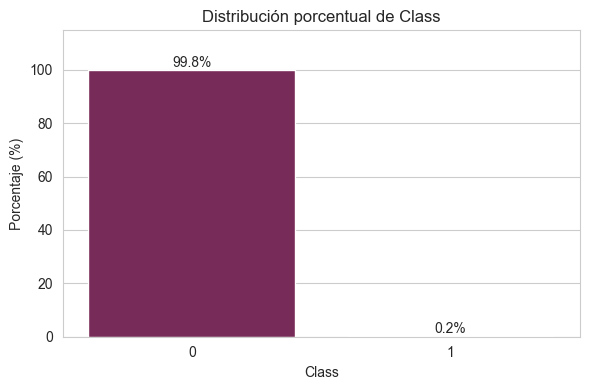

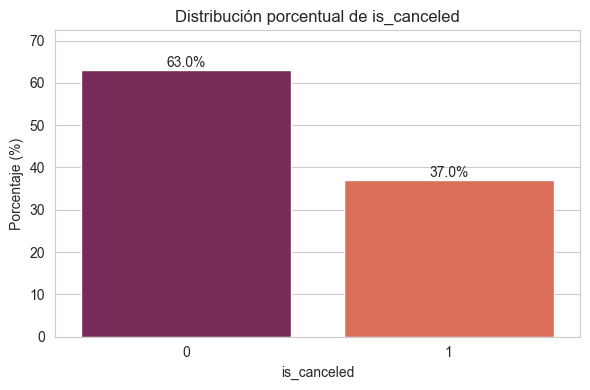

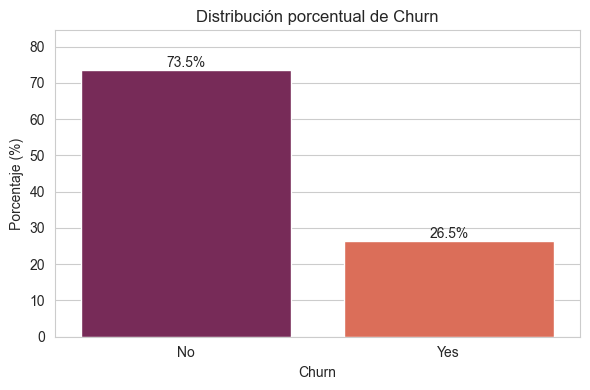

In [26]:
# Vemos la distribución de clases en las variables objetivo como pct

def plot_target_distribution_pct(df, target_col, figsize=(6,4), decimals=1):
    """ Muestra la distribución del target en porcentaje y anota cada barra."""
    
    # Calculamos los porcentajes
    counts = df[target_col].value_counts(normalize=True, dropna=False)
    plt.figure(figsize=figsize)
    sns.barplot(x=counts.index.astype(str), y=counts.values * 100, palette='rocket')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel(target_col)
    plt.title(f'Distribución porcentual de {target_col}')
    
    # Anotamos los porcentajes encima de las barras
    for p, v in zip(plt.gca().patches, counts.values * 100):
        plt.annotate(f"{v:.{decimals}f}%", (p.get_x() + p.get_width() / 2, v),
                    ha='center', va='bottom', fontsize=10)
    plt.ylim(0, counts.values.max() * 100 * 1.15) # Dejamos un poco de espacio extra
    plt.tight_layout() # Ajuste de layout para evitar recortes
    plt.show()

# Aplicamos a los 3 datasets
plot_target_distribution_pct(credit, 'Class')
plot_target_distribution_pct(hotel, 'is_canceled')
plot_target_distribution_pct(churn, 'Churn')

**Interpretación:**
Los gráficos de barras muestran la distribución porcentual de las variables objetivo en cada dataset. Se observa el desequilibrio entre clases (Class, is_canceled, Churn), lo que es fundamental para decidir si es necesario aplicar técnicas de balanceo antes de entrenar modelos de clasificación. El porcentaje de cada categoría se muestra claramente sobre cada barra para facilitar la interpretación.

In [ ]:
# Creamos función de codificación automática mas agil para hacer los 3 datasets juntos
def transform_cat_cols(df, target=None, onehot_max=10):
    """
    Codifica variables categóricas:
    - OneHotEncoder si cardinalidad <= onehot_max
    - Frequency Encoding si cardinalidad > onehot_max (o Target Mean si se pasa target)
    """
    info = df_info(df)
    df_encoded = df.copy()
    for col in info[info['dtype'].isin(['object', 'category'])].index:
        n_unique = info.loc[col, 'n_unique']
        if n_unique <= onehot_max:
            # OneHotEncoder
            ohe = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True, dtype=int)
            df_encoded = df_encoded.drop(columns=[col]).join(ohe)
        else:
            if target is not None:
                # Target Mean Encoding
                means = df_encoded.groupby(col)[target].mean()
                df_encoded[col] = df_encoded[col].map(means)
            else:
                # Frequency Encoding
                freq = df_encoded[col].value_counts(normalize=True)
                df_encoded[col] = df_encoded[col].map(freq)
    return df_encoded

# Aplicamos en los 3 datasets
credit_encoded = transform_cat_cols(credit, target='Class')
hotel_encoded = transform_cat_cols(hotel, target='is_canceled')
churn_encoded = transform_cat_cols(churn, target='Churn_Yes')

# Como si pasamos el parametro target, usamos la codificación Target Mean en lugar de Frequency Encoding para variables de alta cardinalidad.

In [70]:
# Chequeamos que no queden columnas categóricas
print('='*10, f' Columnas categóricas tras codificación en credit_encoded ', '='*10)
print(credit_encoded.dtypes[credit_encoded.dtypes == 'object'])
print('='*10, f' Columnas categóricas tras codificación en hotel_encoded ', '='*10)
print(hotel_encoded.dtypes[hotel_encoded.dtypes == 'object'])
print('='*10, f' Columnas categóricas tras codificación en churn_encoded ', '='*10)
print(churn_encoded.dtypes[churn_encoded.dtypes == 'object'])


# Ahora vemos que cols numericas tenemos en cada dataset tras la codificación
print('\n' + '='*10, f' Columnas numéricas en credit_encoded ', '='*10)
print(f"Total: {len(credit_encoded.select_dtypes(include=[np.number]).columns)} columnas")
print(credit_encoded.select_dtypes(include=[np.number]).columns.tolist())

print('\n' + '='*10, f' Columnas numéricas en hotel_encoded ', '='*10)
print(f"Total: {len(hotel_encoded.select_dtypes(include=[np.number]).columns)} columnas")
print(hotel_encoded.select_dtypes(include=[np.number]).columns.tolist())

print('\n' + '='*10, f' Columnas numéricas en churn_encoded ', '='*10)
print(f"Total: {len(churn_encoded.select_dtypes(include=[np.number]).columns)} columnas")
print(churn_encoded.select_dtypes(include=[np.number]).columns.tolist())

# Verificamos los tipos de datos de algunas columnas para confirmar que son numéricas
print('\n' + '='*10, ' Verificación de tipos de dato (sample) ', '='*10)
print("Credit - primeras 5 columnas:", dict(credit_encoded.dtypes[:5]))
print("Hotel - primeras 5 columnas:", dict(hotel_encoded.dtypes[:5]))
print("Churn - primeras 5 columnas:", dict(churn_encoded.dtypes[:5]))


==========  Columnas categóricas tras codificación en credit_encoded  ==========
Series([], dtype: object)
==========  Columnas categóricas tras codificación en hotel_encoded  ==========
Series([], dtype: object)
==========  Columnas categóricas tras codificación en churn_encoded  ==========
Series([], dtype: object)

==========  Columnas numéricas en credit_encoded  ==========
Total: 31 columnas
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

==========  Columnas numéricas en hotel_encoded  ==========
Total: 56 columnas
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'country', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', '

In [ ]:
# Solo para estar seguros, que se transformo todo bien
print('='*10, ' DataFrame Info ', '='*10)
for name, df_var in [("Credit", credit_encoded), ("Hotel", hotel_encoded), ("Churn", churn_encoded)]:
    print(f"\n{name} — shape: {df_var.shape}")
    display(df_info(df_var))

==========  DataFrame Info  ==========

Credit — shape: (284807, 31)


,dtype,non_null,nulls,pct_null,n_unique,memory_kb,top_3
Class,int64,284807,0,0.0,2,2225.18,"0, 1"
Amount,float64,284807,0,0.0,32767,2225.18,"1.0, 1.98, 0.89"
Time,float64,284807,0,0.0,124592,2225.18,"163152.0, 64947.0, 68780.0"
V1,float64,284807,0,0.0,275663,2225.18,"1.24567381944824, 2.05579700630039, 2.05331121..."
V2,float64,284807,0,0.0,275663,2225.18,"0.166975019545401, -0.32666777306077, 0.089734..."
V3,float64,284807,0,0.0,275663,2225.18,"0.488305742562781, -2.75204095570008, -1.68183..."
V4,float64,284807,0,0.0,275663,2225.18,"0.6353219207244, -0.842316033286871, 0.4542119..."
V5,float64,284807,0,0.0,275663,2225.18,"-0.562776680773863, 2.46307225982454, 0.298310..."
V6,float64,284807,0,0.0,275663,2225.18,"-1.01107261632698, 3.17385642307029, -0.953526..."
V7,float64,284807,0,0.0,275663,2225.18,"0.0149526614685896, -0.432125923987824, 0.1520..."



Hotel — shape: (119390, 56)


,dtype,non_null,nulls,pct_null,n_unique,memory_kb,top_3
company,float64,6797,112593,94.31,352,932.86,"40.0, 223.0, 67.0"
agent,float64,103050,16340,13.69,333,932.86,"9.0, 240.0, 1.0"
country,float64,118902,488,0.41,99,932.86,"0.5663511010495987, 0.20224255915574244, 0.185..."
is_canceled,int64,119390,0,0.00,2,932.86,"0, 1"
is_repeated_guest,int64,119390,0,0.00,2,932.86,"0, 1"
hotel_Resort Hotel,int64,119390,0,0.00,2,932.86,"0, 1"
deposit_type_Non Refund,int64,119390,0,0.00,2,932.86,"0, 1"
deposit_type_Refundable,int64,119390,0,0.00,2,932.86,"0, 1"
reservation_status_Check-Out,int64,119390,0,0.00,2,932.86,"1, 0"
reservation_status_No-Show,int64,119390,0,0.00,2,932.86,"0, 1"



Churn — shape: (7043, 32)


,dtype,non_null,nulls,pct_null,n_unique,memory_kb,top_3
customerID,float64,7043,0,0.0,2,55.15,"0.0, 1.0"
SeniorCitizen,int64,7043,0,0.0,2,55.15,"0, 1"
gender_Male,int64,7043,0,0.0,2,55.15,"1, 0"
Partner_Yes,int64,7043,0,0.0,2,55.15,"0, 1"
Dependents_Yes,int64,7043,0,0.0,2,55.15,"0, 1"
PhoneService_Yes,int64,7043,0,0.0,2,55.15,"1, 0"
PaperlessBilling_Yes,int64,7043,0,0.0,2,55.15,"1, 0"
Churn_Yes,int64,7043,0,0.0,2,55.15,"0, 1"
MultipleLines_No phone service,int64,7043,0,0.0,2,55.15,"0, 1"
MultipleLines_Yes,int64,7043,0,0.0,2,55.15,"0, 1"


In [76]:
# Imputación de valores faltantes adaptable al tamaño del dataset

from sklearn.impute import KNNImputer, SimpleImputer

def imputador(df, size_threshold=100000, missing_threshold=0.3, n_neighbors=5):
    """
    Imputa valores faltantes de forma inteligente según el tamaño del dataset.

    - Para datasets grandes (> size_threshold) usamos SimpleImputer(median).
    - size_threshold consiste en el umbral de filas para considerar un dataset como grande.
    - Para datasets pequeños y con bajo % missing usamos KNNImputer (tras escalar).
    - Si no hay columnas categóricas (por haber sido ya codificadas), se omite esa parte.
    """
    df_clean = df.copy()
    n_rows = len(df_clean)

    # Columnas numéricas y categóricas (si las hay, no debería)
    num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

    # Imputación categórica: solo si existen columnas categóricas
    if cat_cols:
        print(f"Imputando columnas categóricas: {cat_cols}")
        for col in cat_cols:
            if df_clean[col].isnull().sum() > 0:
                if df_clean[col].nunique() <= 10:
                    mode = df_clean[col].mode()
                    fill = mode[0] if not mode.empty else 'Unknown'
                    df_clean[col].fillna(fill, inplace=True)
                else:
                    df_clean[col].fillna('Unknown', inplace=True)
    else:
        # Mensaje informativo; no hacemos nada con categóricas
        print("No hay columnas categóricas para imputar. Se omite esa etapa.")

    # Imputación numérica
    if num_cols:
        total_missing = int(df_clean[num_cols].isnull().sum().sum())
        pct_missing = total_missing / (len(df_clean) * len(num_cols)) if len(df_clean) * len(num_cols) > 0 else 0.0

        if total_missing == 0:
            print(f"No hay valores faltantes numéricos (0) en las {len(num_cols)} columnas numéricas.")
            return df_clean

        # Decidimos estrategia
        if n_rows > size_threshold:
            strategy = "SimpleImputer(median) - Dataset grande"
            imputer = SimpleImputer(strategy='median')
            df_clean[num_cols] = imputer.fit_transform(df_clean[num_cols])

        elif pct_missing > missing_threshold:
            strategy = f"SimpleImputer(median) - % missing ({pct_missing:.1%}) alto"
            imputer = SimpleImputer(strategy='median')
            df_clean[num_cols] = imputer.fit_transform(df_clean[num_cols])

        else:
            # Dataset pequeño y poco missing → KNNImputer
            strategy = f"KNNImputer(n={n_neighbors}) - Dataset pequeño con correlación"
            # Escalamos antes de KNN para que la distancia sea adecuada
            from sklearn.preprocessing import StandardScaler
            scaler = StandardScaler()
            num_data = df_clean[num_cols].values.astype(float)
            # Guardamos máscara para columnas con all-NaN (KNN no funciona bien con ellas)
            cols_all_nan = [c for c in num_cols if df_clean[c].isna().all()]
            if cols_all_nan:
                # Si existen columnas completamente NaN, imputamos con mediana primero
                for c in cols_all_nan:
                    df_clean[c].fillna(df_clean[c].median(), inplace=True)
                num_data = df_clean[num_cols].values.astype(float)

            scaled = scaler.fit_transform(num_data)
            imputer = KNNImputer(n_neighbors=n_neighbors)
            imputed = imputer.fit_transform(scaled)
            # Volvemos a la escala original
            imputed_orig = scaler.inverse_transform(imputed)
            df_clean[num_cols] = imputed_orig

        print(f"Estrategia usada: {strategy}")
        print(f"  - Filas: {n_rows:,} | Missing original: {total_missing} ({pct_missing:.2%})")

    else:
        print("No hay columnas numéricas sobre las que imputar.")

    return df_clean


# Aplicamos a los 3 datasets (ejemplo)
print("="*60)
print("IMPUTACIÓN DE VALORES FALTANTES")
print("="*60)

# Credit Card Fraud
print("\n[1] Credit Card Fraud:")
credit_clean = imputador(credit, size_threshold=100000)

# Hotel Bookings
print("\n[2] Hotel Bookings:")
hotel_clean = imputador(hotel, size_threshold=100000)

# Telco Churn (primero limpiamos TotalCharges si existe)
print("\n[3] Telco Customer Churn:")
churn_prep = churn.copy()
if 'TotalCharges' in churn_prep.columns:
    churn_prep['TotalCharges'] = pd.to_numeric(churn_prep['TotalCharges'], errors='coerce')
churn_clean = imputador(churn_prep, size_threshold=100000)

print("\n" + "="*60)
print("✓ Imputación completada para los 3 datasets")

IMPUTACIÓN DE VALORES FALTANTES

[1] Credit Card Fraud:
No hay columnas categóricas para imputar. Se omite esa etapa.
No hay valores faltantes numéricos (0) en las 31 columnas numéricas.

[2] Hotel Bookings:
Imputando columnas categóricas: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
Estrategia usada: SimpleImputer(median) - Dataset grande
  - Filas: 119,390 | Missing original: 128937 (5.40%)

[3] Telco Customer Churn:
Imputando columnas categóricas: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Estrategia usada: KNNImputer(n=5) - Dataset pequeño con correlación
  - Filas: 7,043 | Missing original: 11 

In [77]:
# Chequeamos que no queden valores faltantes
print('\n' + '='*10, ' Valores faltantes tras imputación ', '='*10)
for name, df_var in [("Credit", credit_clean), ("Hotel", hotel_clean), ("Churn", churn_clean)]:
    total_missing = int(df_var.isnull().sum().sum())
    print(f"{name} - Valores faltantes totales: {total_missing}")


==========  Valores faltantes tras imputación  ==========
Credit - Valores faltantes totales: 0
Hotel - Valores faltantes totales: 0
Churn - Valores faltantes totales: 0


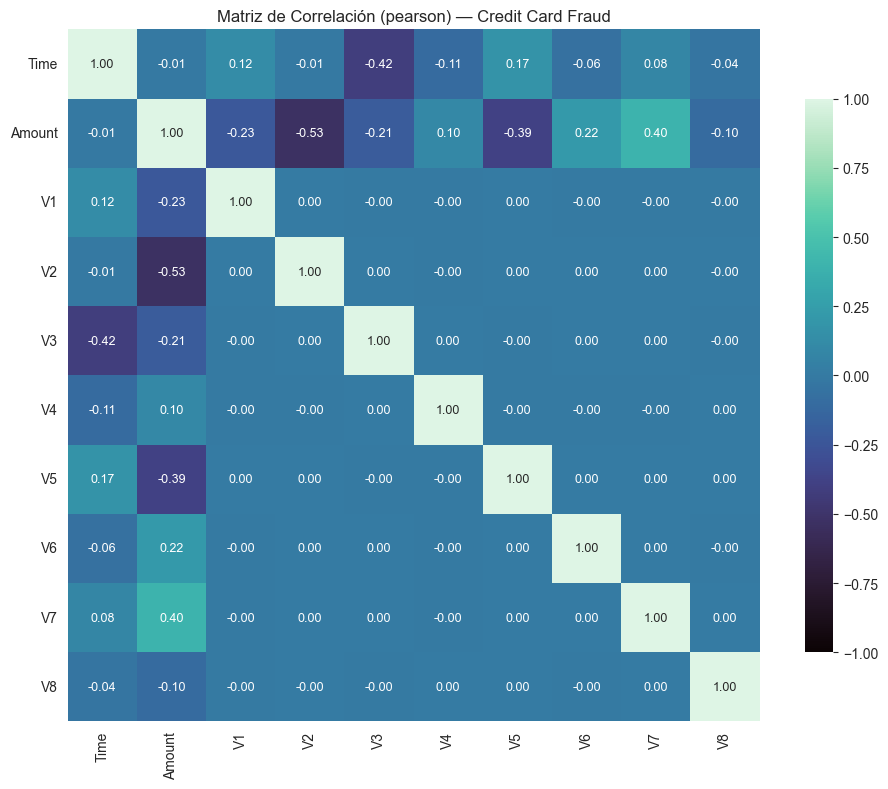

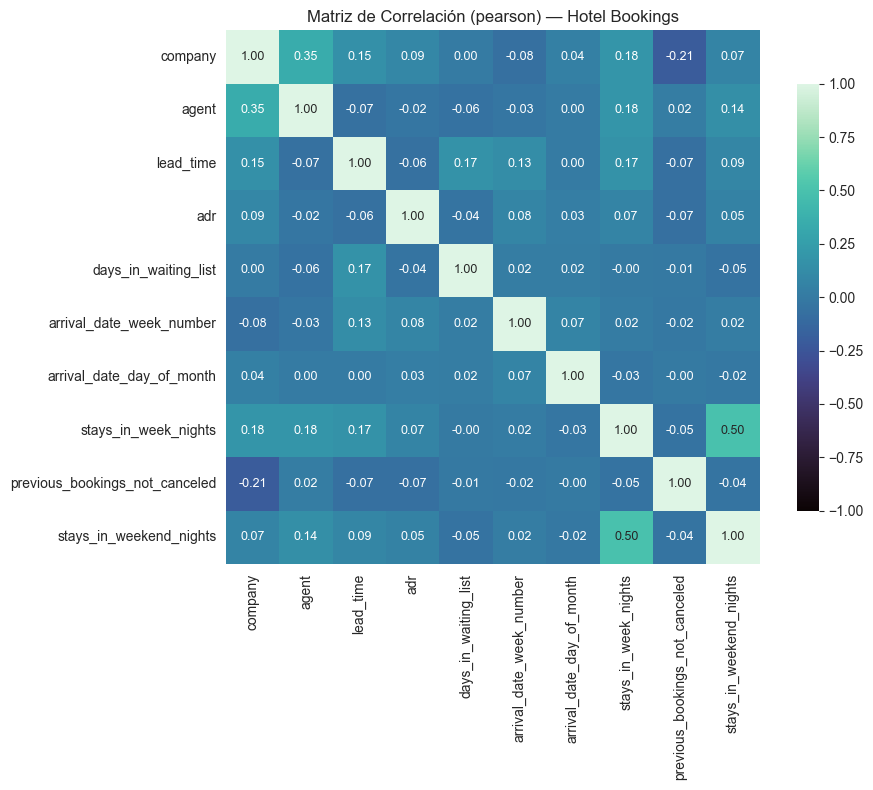

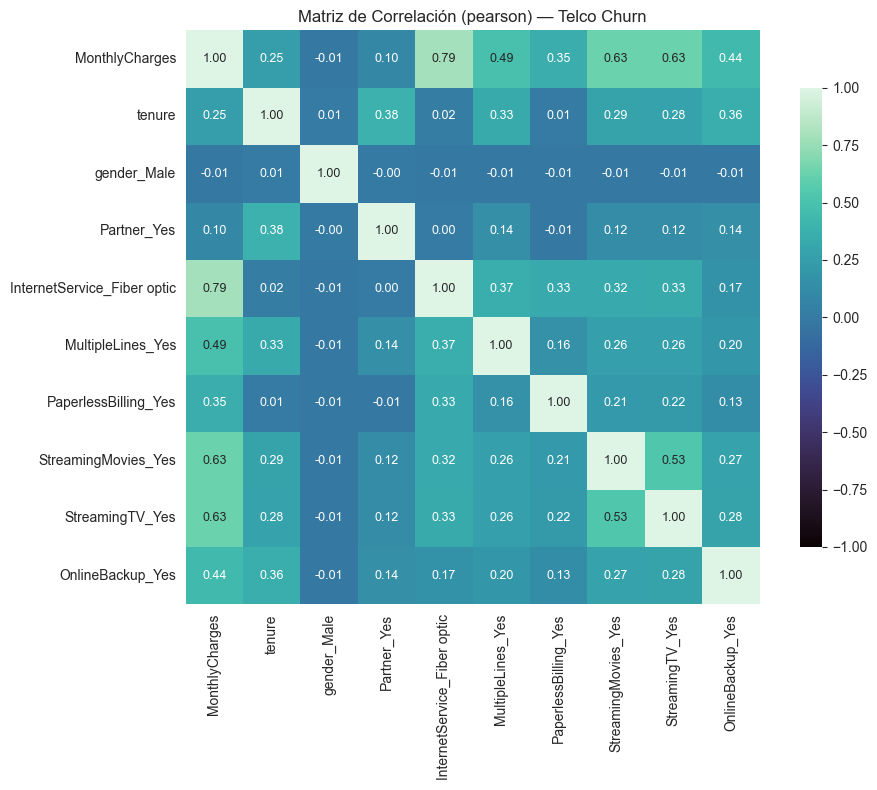

In [78]:
# Seguimos viendo matrices de correlación a las 10 variables numéricas principales

def plot_correlation_matrix(
    df, 
    figsize=(10,8), 
    method='pearson', 
    annot=True, 
    cmap='mako', 
    top_n=10, 
    annot_size=9,
    by='var',  # 'var' para top_n por varianza, 'corr' para top_n por correlación con target_col
    target_col=None,
    nombre_df=None
):
    """
    Muestra la matriz de correlación de las top_n columnas numéricas más relevantes.
    by: 'var' (por varianza, default) o 'corr' (por correlación con target_col).
    target_col: nombre de la columna objetivo si by='corr'.
    nombre_df: nombre a mostrar en el título (opcional).
    """
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if not num_cols:
        raise ValueError("No hay columnas numéricas en el DataFrame.")

    # Selección de columnas
    if by == 'corr' and target_col is not None and target_col in df.columns:
        # Selecciona top_n columnas más correlacionadas con target_col
        abs_corr = df[num_cols].corrwith(df[target_col]).abs().sort_values(ascending=False)
        sel = abs_corr.drop(target_col, errors='ignore').head(top_n).index.tolist()
        if target_col not in sel:
            sel = [target_col] + sel
    else:
        # Selecciona top_n por varianza
        if len(num_cols) > top_n:
            vars_sorted = df[num_cols].var().sort_values(ascending=False)
            sel = vars_sorted.head(top_n).index.tolist()
        else:
            sel = num_cols

    corr = df[sel].corr(method=method)

    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        corr, annot=annot, fmt=".2f", annot_kws={'size': annot_size}, cmap=cmap,
        square=True, cbar_kws={"shrink": .8}, vmin=-1, vmax=1
    )
    titulo = f'Matriz de Correlación ({method})'
    if nombre_df:
        titulo += f" — {nombre_df}"
    ax.set_title(titulo)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
plot_correlation_matrix(credit_encoded, top_n=10, nombre_df="Credit Card Fraud")
plot_correlation_matrix(hotel_encoded, top_n=10, nombre_df="Hotel Bookings")
plot_correlation_matrix(churn_encoded, top_n=10, nombre_df="Telco Churn")

**Interpretación:**
Los heatmaps de correlación muestran las relaciones lineales entre las 10 variables numéricas más relevantes (por varianza) de cada dataset. Se pueden identificar pares de variables con alta correlación positiva o negativa, lo que puede indicar redundancia o la necesidad de seleccionar variables relevantes para el modelado. Es importante considerar estas correlaciones para evitar problemas de multicolinealidad en modelos predictivos.

Comenzamos con graficos particulares para cada dataset.

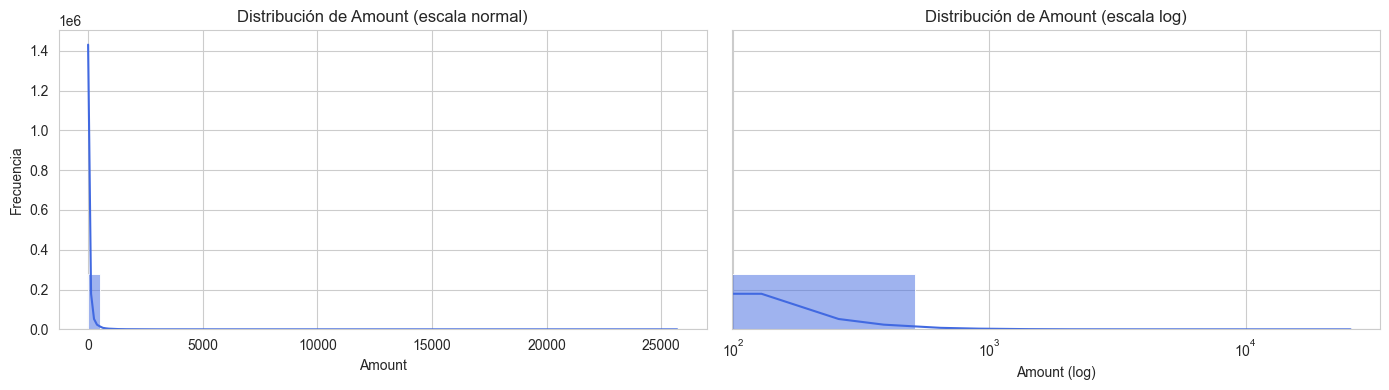

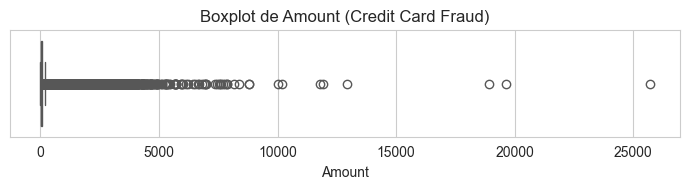

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

# Histograma normal
sns.histplot(credit['Amount'], bins=50, color='royalblue', kde=True, ax=axes[0])
axes[0].set_title('Distribución de Amount (escala normal)')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frecuencia')

# Histograma con escala logarítmica en X
sns.histplot(credit['Amount'], bins=50, color='royalblue', kde=True, ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title('Distribución de Amount (escala log)')
axes[1].set_xlabel('Amount (log)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

#  Boxplot para detectar outliers en Amount
plt.figure(figsize=(7,2))
sns.boxplot(x=credit['Amount'], color='royalblue')
plt.title('Boxplot de Amount (Credit Card Fraud)')
plt.xlabel('Amount')
plt.tight_layout()
plt.show()


**Interpretación:**
El primer gráfico muestra dos histogramas comparativos de la variable Amount del dataset Credit Card Fraud: uno en escala normal y otro en escala logarítmica. Se observa una alta concentración de valores bajos y la presencia de valores extremos (outliers), lo que sugiere una distribución sesgada a la derecha. La escala logarítmica facilita la visualización de la distribución completa. El segundo gráfico es un boxplot que confirma la presencia de numerosos outliers en Amount, útil para el análisis de riesgo y la detección de fraudes.

### Interpretación de los histogramas de Amount (Credit Card Fraud)

- **Gráfico de la izquierda (escala normal):**
  - La mayoría de las transacciones tienen montos bajos, concentrados cerca de cero.
  - Los valores altos (outliers) no se aprecian bien porque quedan "aplastados" por la escala.

- **Gráfico de la derecha (escala logarítmica):**
  - Permite visualizar mejor la distribución de los montos altos.
  - Se observan algunos outliers (transacciones de montos muy elevados) que en la escala normal no se distinguen.

**Conclusión:**
- La variable `Amount` está fuertemente sesgada a la derecha (muchos valores bajos, pocos valores muy altos).
- Usar escala logarítmica ayuda a detectar outliers y analizar mejor la dispersión de los datos.

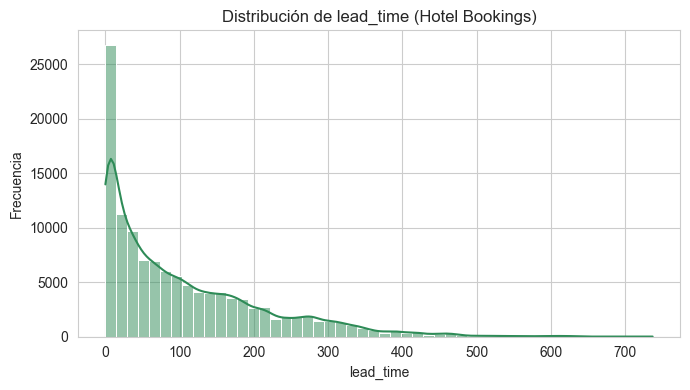

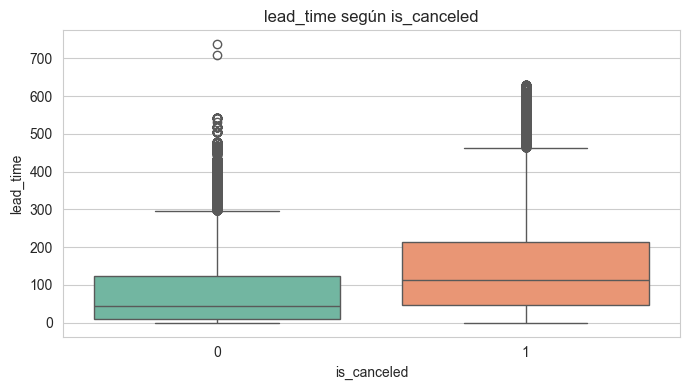

In [80]:
# Distribución de lead_time en Hotel Bookings
plt.figure(figsize=(7,4))
sns.histplot(hotel['lead_time'], bins=50, color='seagreen', kde=True)
plt.title('Distribución de lead_time (Hotel Bookings)')
plt.xlabel('lead_time')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Boxplot para lead_time según is_canceled
plt.figure(figsize=(7,4))
sns.boxplot(x='is_canceled', y='lead_time', data=hotel, palette='Set2')
plt.title('lead_time según is_canceled')
plt.xlabel('is_canceled')
plt.ylabel('lead_time')
plt.tight_layout()
plt.show()

**Interpretación:**
El primer histograma muestra la distribución de la variable lead_time (tiempo de anticipación de reserva) en el dataset Hotel Bookings, con una distribución sesgada hacia valores bajos. El segundo gráfico es un boxplot comparativo que muestra lead_time según la variable is_canceled, permitiendo identificar diferencias en el comportamiento de reservas según si fueron canceladas o no, así como la presencia de outliers en ambos grupos.

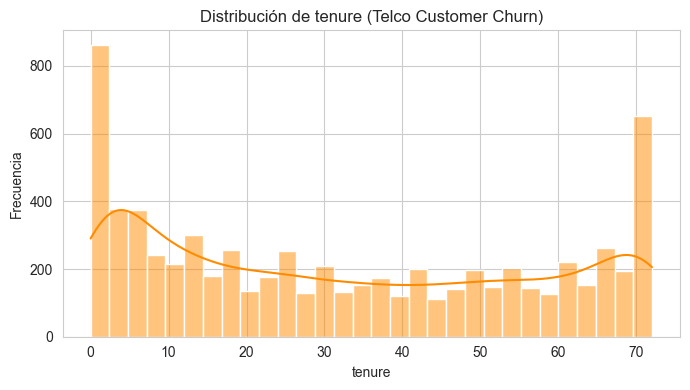

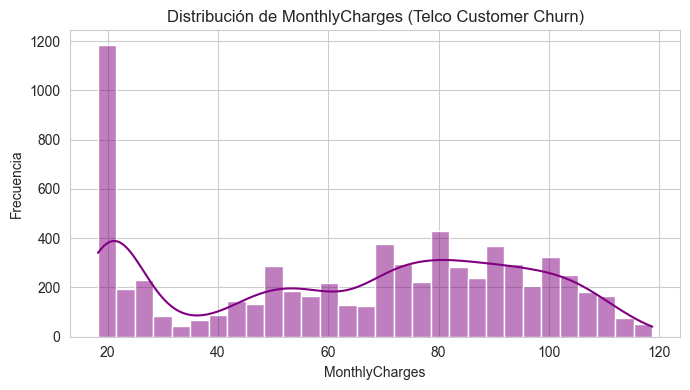

In [81]:
# Distribución de tenure en Telco Customer Churn
plt.figure(figsize=(7,4))
sns.histplot(churn['tenure'], bins=30, color='darkorange', kde=True)
plt.title('Distribución de tenure (Telco Customer Churn)')
plt.xlabel('tenure')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Distribución de MonthlyCharges en Telco Customer Churn
plt.figure(figsize=(7,4))
sns.histplot(churn['MonthlyCharges'], bins=30, color='purple', kde=True)
plt.title('Distribución de MonthlyCharges (Telco Customer Churn)')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

**Interpretación:**
Los dos histogramas muestran la distribución de variables clave del dataset Telco Customer Churn. El primero representa tenure (antigüedad del cliente en meses), mostrando una distribución relativamente uniforme con concentración en valores bajos y altos. El segundo representa MonthlyCharges (cargo mensual), con una distribución más dispersa que sugiere variabilidad en los planes de servicio contratados por los clientes.

## Interpretación general de los gráficos

A continuación se presenta una interpretación formal y general para los principales tipos de gráficos utilizados en el análisis exploratorio de los datasets:

**Histogramas:**
Los histogramas permiten visualizar la distribución de una variable numérica, identificando patrones, sesgos, presencia de outliers y posibles transformaciones necesarias (como el uso de escala logarítmica). Son útiles para comparar la dispersión y concentración de los datos entre diferentes conjuntos o categorías.

**Boxplots:**
Los boxplots muestran la mediana, los cuartiles y los valores atípicos de una variable. Facilitan la comparación entre grupos y la detección de outliers, permitiendo evaluar la simetría y dispersión de los datos. Son especialmente útiles para variables con distribución no normal o con presencia de valores extremos.

**Heatmaps de correlación:**
Los mapas de calor de correlación permiten identificar relaciones lineales entre variables numéricas. Una alta correlación puede indicar redundancia o la necesidad de seleccionar variables relevantes para el modelado. Es fundamental interpretar tanto correlaciones positivas como negativas y considerar su impacto en el análisis y la construcción de modelos.

**Countplots y gráficos de barras:**
Estos gráficos muestran la frecuencia de categorías en variables cualitativas, permitiendo identificar desequilibrios, clases mayoritarias/minoritarias y posibles sesgos en los datos. Son esenciales para el análisis de variables objetivo y la evaluación de la necesidad de técnicas de balanceo.

**Gráficos comparativos (subplots):**
La comparación visual entre diferentes datasets o categorías mediante subplots facilita la identificación de similitudes y diferencias en la distribución de variables clave. Esto contribuye a una mejor comprensión del contexto y a la toma de decisiones informadas en el preprocesamiento y modelado.

---

Cada gráfico aporta información valiosa para el análisis exploratorio, permitiendo detectar patrones, anomalías y relaciones relevantes. La interpretación adecuada de estas visualizaciones es fundamental para orientar el proceso de limpieza, transformación y selección de variables, asegurando la calidad y robustez del análisis.